In [ ]:
!pip install tflite_model_maker
!pip install os
!pip install numpy
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.

In [ ]:
!sudo pip install numpy --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.3 which is incompatible.


In [ ]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive

drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!unzip /content/drive/MyDrive/HANDWRITTEN_DATA/TEST_CUT_DATA.zip

In [ ]:
data = DataLoader.from_folder('/content/CROPPED_150_20-04-2023')

In [ ]:
##Splitting the dataset:

train_data, test_data = data.split(0.80)

In [ ]:
## splitting the test and validation:

test_data,val_data = test_data.split(0.50)

In [ ]:
model = image_classifier.create(train_data, validation_data=val_data, epochs=50, train_whole_model=True,learning_rate=0.001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 24)                30744     
                                                                 
Total params: 3,443,768
Trainable params: 3,443,768
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50


90/90 [==============================] - 35s 241ms/step - loss: 2.5287 - accuracy: 0.3281 - val_loss: 1.7259 - val_accuracy: 0.6083
Epoch 2/50
90/90 [==============================] - 21s 236ms/step - loss: 1.2747 - accuracy: 0.7983 - val_loss: 1.0004 - val_accuracy: 0.8806
Epoch 3/50
90/90 [==============================] - 21s 237ms/step - loss: 0.9753 - accuracy: 0.9177 - val_loss: 0.8754 - val_accuracy: 0.9389
Epoch 4/50
90/90 [==============================] - 22s 248ms/step - loss: 0.8583 - accuracy: 0.9528 - val_loss: 0.8241 - val_accuracy: 0.9528
Epoch 5/50
90/90 [==============================] - 22s 247ms/step - loss: 0.8162 - accuracy: 0.9684 - val_loss: 0.8060 - val_accuracy: 0.9472
Epoch 6/50
90/90 [==============================] - 21s 238ms/step - loss: 0.7801 - accuracy: 0.9774 - val_loss: 0.7865 - val_accuracy: 0.9528
Epoch 7/50
90/90 [==============================] - 23s 250ms/step - loss: 0.7565 - accuracy: 0.9833 - val_loss: 0.7613 - val_accuracy: 0.9611
Epoch 8/50

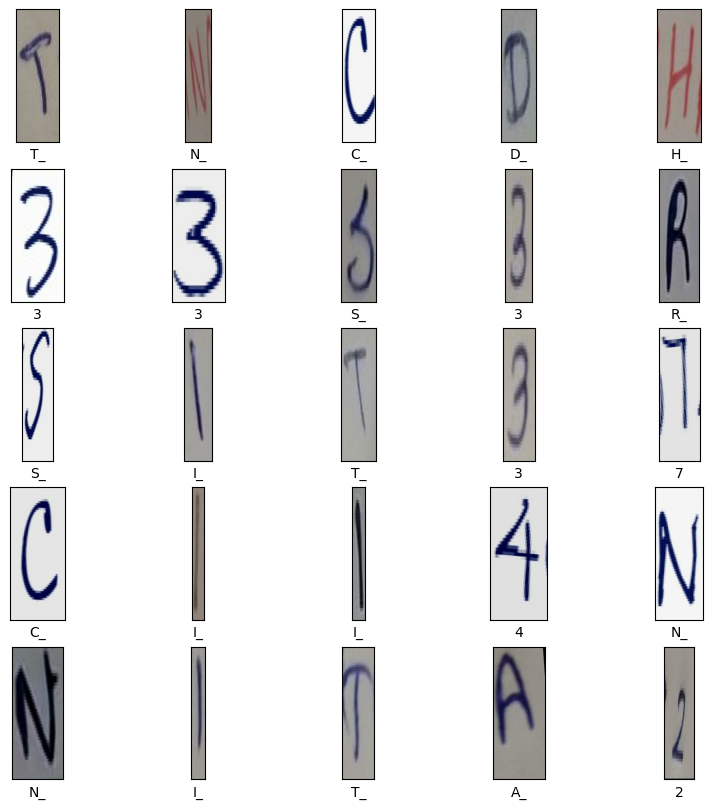

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

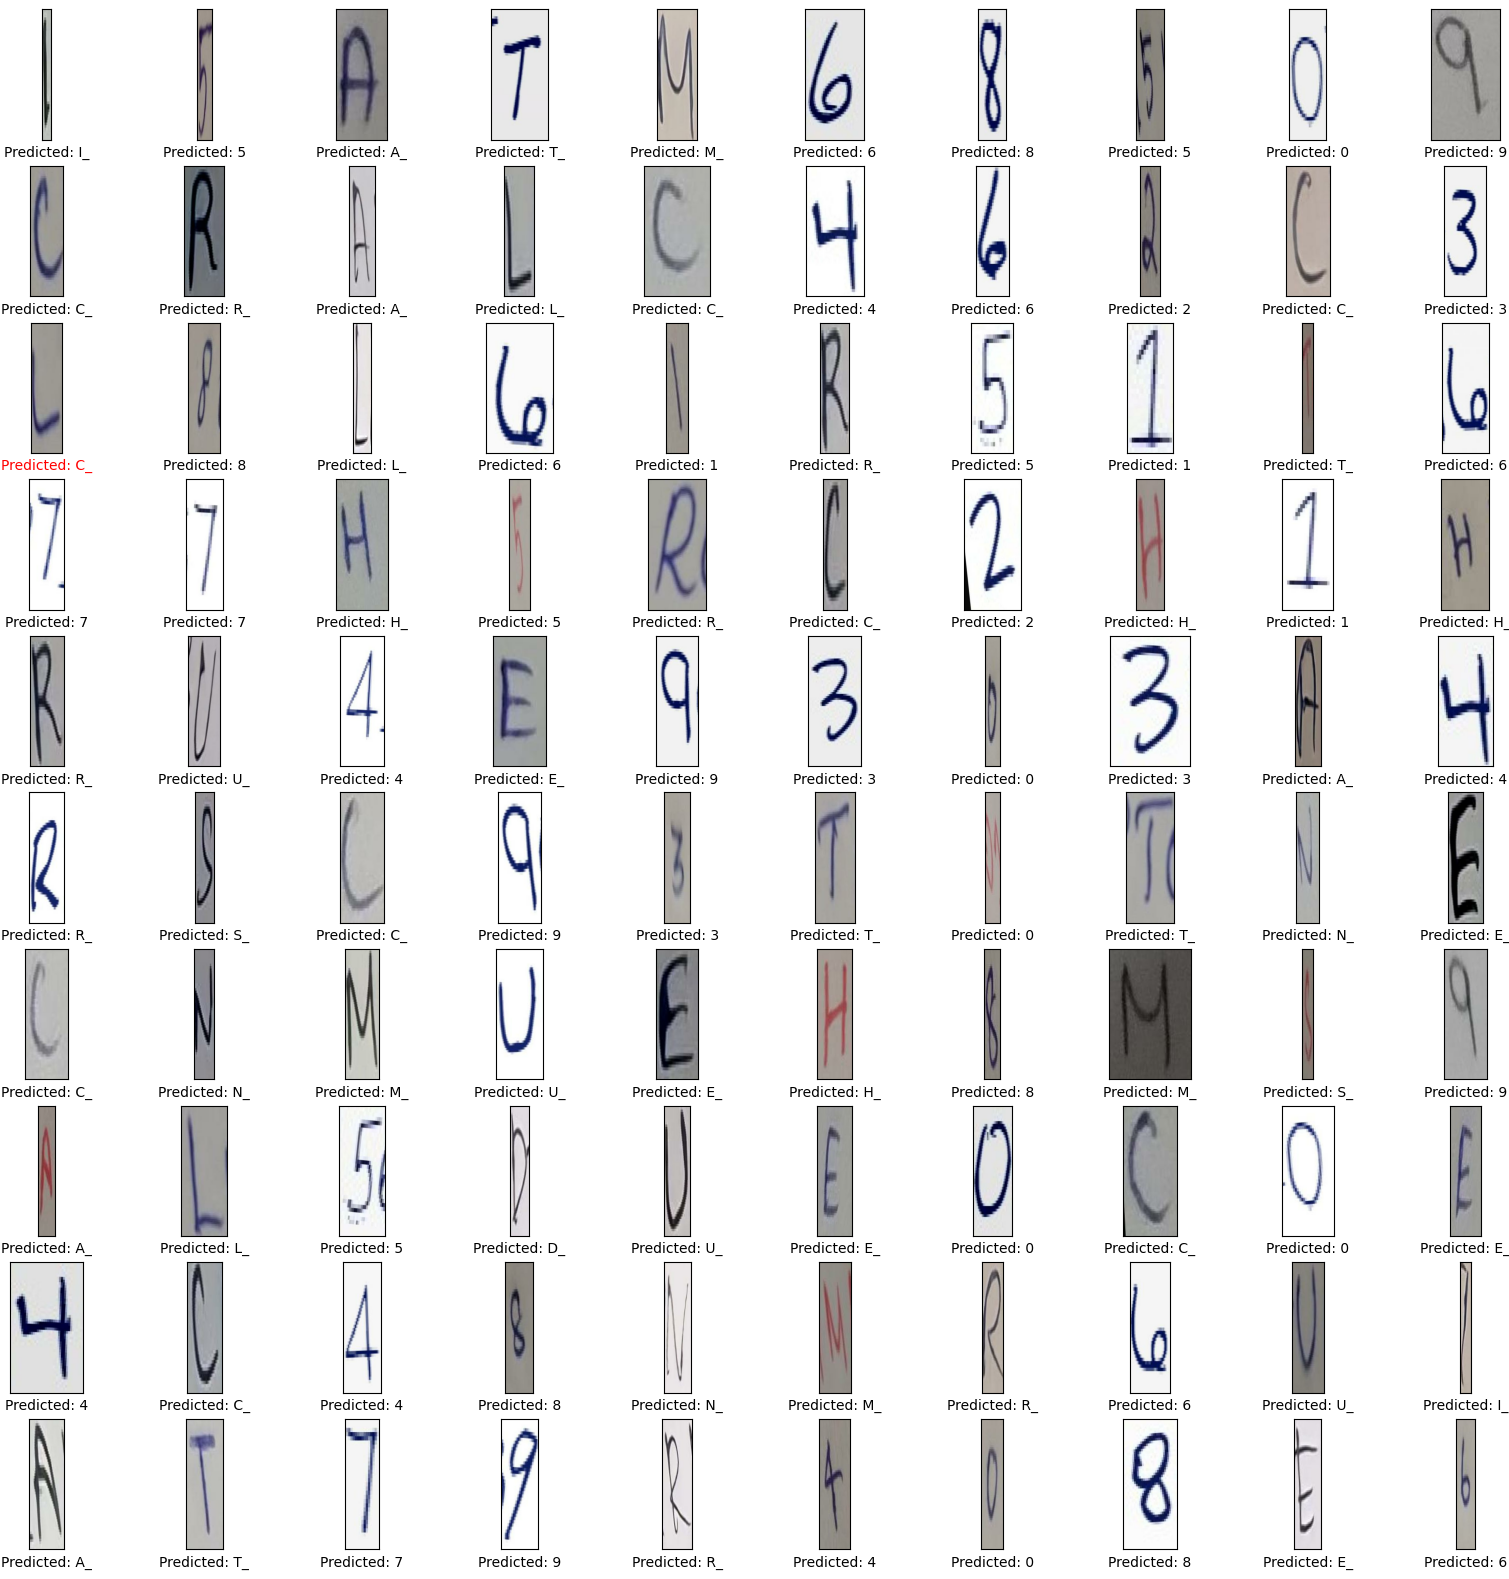

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.SAVED_MODEL)


In [ ]:
model.export(export_dir='', tflite_filename='model_fp16.tflite')


/usr/local/lib/python3.9/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
!zip -r SAVED_MODEL_handwriting_num_alpha.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/keras_metadata.pb (deflated 81%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 82%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_model/saved_model.pb (deflated 92%)


In [ ]:
def tflite_inference(input):
    model_name = f'/content/drive/MyDrive/HANDWRITTEN_DATA/MODELS_NUM_20_4_23/num_alpha.tflite'
    interpreter = tf.lite.Interpreter(model_path=model_name)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    # print(input_details[0])
    # print(output_details)
    interpreter.allocate_tensors()
    interpreter.set_tensor(input_details[0]['index'], input)
    interpreter.invoke()
    detection_scores = interpreter.get_tensor(output_details[0]['index'])
    # detection_boxes = interpreter.get_tensor(output_details[1]['index'])
    # detection_count = interpreter.get_tensor(output_details[2]['index'])
    # detection_classes = interpreter.get_tensor(output_details[3]['index'])
    # print(detection_classes)
    # print('Check ---- ', detection_classes.shape)
    return detection_scores#, detection_boxes#, detection_classes, detection_count

In [ ]:
cls_labels=['0','1','2','3','4','5','6','7','8','9','A_','C_','D_','E_','H_','I_','L_','M_','N_','O_','R_','S_','T_','U_']

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

['16.jpg', '13.jpg', '15.jpg', '14.jpg', '12.jpg']
7
6
6
7
7


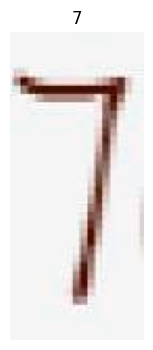

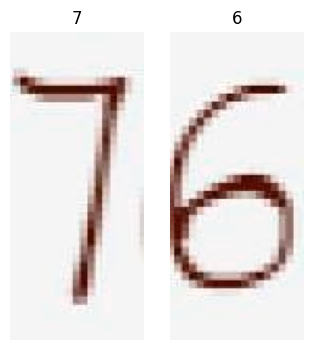

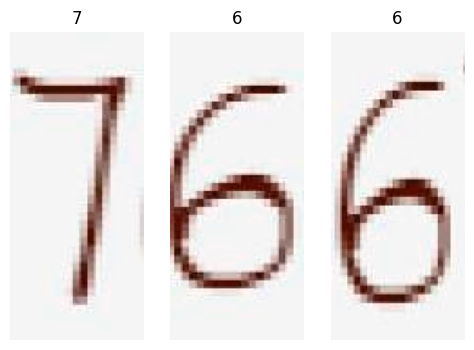

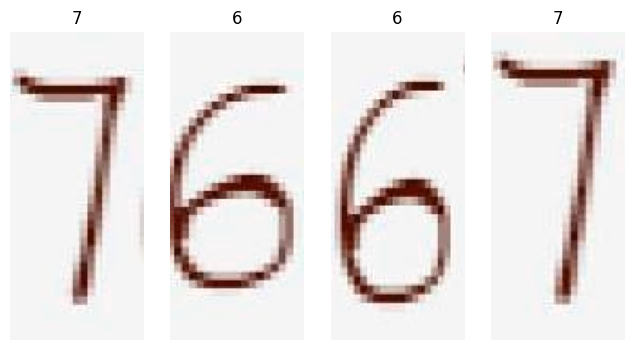

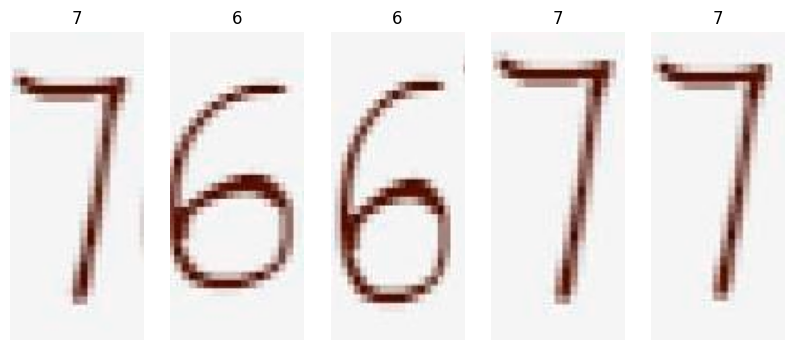

In [ ]:
dir = '/content/TEST_CUT_DATA/3_png'
dir_list = os.listdir(dir)
dir_count = len(dir_list)

print(dir_list)
class_names = cls_labels

number_img = []
number_pred = []

for img_path in sorted(glob(dir + '/*.jpg')):
  # im_path = '/content/Data/22_jpg/106.jpg'
  orig_img = cv2.imread(img_path)
  IMAGE_SHAPE = (224,224)

  img_array = cv2.resize(orig_img,IMAGE_SHAPE)
  img_array = np.uint8(img_array)
  img_array = np.expand_dims(img_array,axis=0)

  pred_scores  = tflite_inference(img_array)
  #print(pred_scores)
  pred = class_names[np.argmax(pred_scores)]

  print(pred)
  number_img.append(orig_img)
  number_pred.append(pred)

  plt.figure(figsize=(10, 4))
   #for i in range(dir_count):
  i = 0

#print((number_pred))
  for images, labels in zip(number_img, number_pred):

    ax = plt.subplot(1, dir_count, i + 1)
    plt.imshow(images.astype("uint8"), aspect='auto')
    plt.title(labels)
    plt.axis("off")
    i += 1